<div style="background-color: #f0f8ff; padding: 10px; border-radius: 5px;">

  # **Fashion CNN Project!👗👚👖👟**


  **🎯 Objective & Data Description**:  
Hi there, welcome! :) In my project, we're going to be diving into a world of fashion using the Fashion MNIST dataset. We are wanting to build a Convolutional Neural Network (CNN) with Keras that will have the capability to classify images of clothing items into 10 categories, ranging from T-shirts to ankle boots. Along the way, I'll experiment with different activation functions and optimization techniques to understand how they affect our model’s performance.

   **About the Dataset:**  
  This dataset contains about 70,000 grayscale images, each with a resolution of 28x28 pixels. Each image represents one of 10 different types of fashion items.
  
  - **Training Set**: 60,000 images  
  - **Test Set**: 10,000 images  
  - **Classes**: 10 categories (Dress, Sneaker, etc.)  

   **Research Objectives:** 
   1. 🧠 **Model Development**: Build a CNN that can accurately classify clothing images.
   2. 🚀 **Activation Function Experimentation**: Test Sigmoid, Tanh, and ReLU to see their impact on performance.
   3. ⚙️ **Optimization Analysis**: Try out optimizers like SGD and Adam to observe training behavior.
   4. 📊 **Evaluation**: Use accuracy and other metrics to compare results across different setups.
   
</div>


In [5]:
# !pip install tensorflow

In [6]:
# !pip install tensorflow --upgrade

In [96]:
# importing libraries that will be necessary for us ...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [27]:
import sys
print(sys.executable)

/Users/darlavalderrama/miniconda3/envs/tensorflow_env/bin/python


In [28]:
# loading both our training and testing datasets
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

In [29]:
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [31]:
test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [32]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [33]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [34]:
# quick check for missing values in training and testing ds
print("Missing values in the training data:", train_data.isnull().sum().sum())
print("Missing values in the test data:", test_data.isnull().sum().sum())

Missing values in the training data: 0
Missing values in the test data: 0


In [35]:
train_data.iloc[:, 0].value_counts() 
# exploring distribution of labels in traning data

label
2    6000
9    6000
6    6000
0    6000
3    6000
4    6000
5    6000
8    6000
7    6000
1    6000
Name: count, dtype: int64

In [36]:
train_data.shape, test_data.shape

((60000, 785), (10000, 785))

In [37]:
# now i am making sure to separate our labels and features
X_train = train_data.iloc[:, 1:].values  # pixels
y_train = train_data.iloc[:, 0].values   

In [38]:
X_test = test_data.iloc[:, 1:].values    # pixels
y_test = test_data.iloc[:, 0].values

<div style="background-color:#DFF0D8; color:#3C763D; padding:10px; border-radius:5px">
    <h2>Data Preprocessing 📊</h2>
    <p>Includes handling missing values, normalizing numerical features & pixel values, separating our labels/features to prepare the data for future modeling, and reshaping our data!</p>
</div>

In [39]:
# normalizing pixel vals
X_train = X_train / 255.0 

In [40]:
# normalizing pixel vals
X_test = X_test / 255.0

In [41]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [42]:
X_test

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00392157,
        0.        ],
       [0.        , 0.00392157, 0.01176471, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [43]:
# images need to be reshaped 28x28 pixels
X_train = X_train.reshape(-1, 28, 28, 1)

In [44]:
# images need to be reshaped 28x28 pixels
X_test = X_test.reshape(-1, 28, 28, 1)

In [45]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000,)


In [46]:
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Test data shape: (10000, 28, 28, 1)
Test labels shape: (10000,)


Thus far, these outputs above are letting us know that we have been able to train our data and labels shape as output above displays. We have also reshaped our test images and test set as well. These shapes are going to help me for input into our CNN model for Keras! 

<div style="background-color:#D9EDF7; color:#31708F; padding:10px; border-radius:5px">
    <h2> 🧠 Model Design ~</h2>
    <p>We are ready to outline some of the architecture of our neural net, including elements like the number of layers, activation functions, and the design rationale!</p>
</div>

In [47]:
# okay so some of the things we need to do are to set up an input shape to handle our 
# 28x28 grayscale images

In [48]:
# then we are going to see to add our hidden layers (3) so we are able to capture features

In [49]:
# once we do that, we will be able to flatten output and follow up by ...

In [50]:
# intializing our model so that it creates a linear stack of layers 
mymodel = Sequential()

In [51]:
# 1st convolu. Layer
mymodel.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))

In [52]:
# 2nd convolu. Layer
mymodel.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))

In [53]:
# 3rd convolu. Layer
mymodel.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
mymodel.add(MaxPooling2D(pool_size=(2, 2)))

In [54]:
# flattening layers here as well ...
mymodel.add(Flatten())

In [55]:
# connecting dense layers ...
mymodel.add(Dense(units=128, activation='relu'))
mymodel.add(Dropout(0.5))  # attempt to add drop out for regularization? we will see how this helps.
mymodel.add(Dense(units=64, activation='relu'))

In [56]:
# adding here an output layer w/ about 10 units so that is 1 for each class in our dataset
mymodel.add(Dense(units=10, activation='softmax'))


<div style="background-color:#E8EAF6; color:#3F51B5; padding:10px; border-radius:5px">
    <h2>Activation Functions! 🚀</h2>
    <p>Now we are going to be exploring the use of different activation functions as suggested! This includes functions like Sigmoid, Tanh, and ReLU in our neural network. Were going to compare the effects of each activation function on model performance to determine the most effective configuration. Meaning that I am going to be adjusting our model to test those functions on different hidden layers. My approach will be creating 3 separate models with each function uniquely.</p>
</div>

In [57]:
# our 1st model w/ ReLU 
relu_model = Sequential()
relu_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
relu_model.add(MaxPooling2D((2, 2)))

relu_model.add(Conv2D(64, (3, 3), activation='relu'))
relu_model.add(MaxPooling2D((2, 2)))

relu_model.add(Conv2D(128, (3, 3), activation='relu'))
relu_model.add(MaxPooling2D((2, 2)))

In [58]:
relu_model.add(Flatten())

In [59]:
relu_model.add(Dense(128, activation='relu'))

In [60]:
relu_model.add(Dense(64, activation='relu'))

In [63]:
relu_model.add(Dense(10, activation='softmax'))  # output w/ softmax

In [64]:
relu_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [65]:
# it seems to be that this approach is working well so im going to continue with the next 2 models below ...


In [68]:
# our 2nd model w/ Tanh
tanh_model = Sequential()
tanh_model.add(Conv2D(32, (3, 3), activation='tanh', input_shape=(28, 28, 1)))
tanh_model.add(MaxPooling2D((2, 2)))

tanh_model.add(Conv2D(64, (3, 3), activation='tanh'))
tanh_model.add(MaxPooling2D((2, 2)))

tanh_model.add(Conv2D(128, (3, 3), activation='tanh'))
tanh_model.add(MaxPooling2D((2, 2)))

In [69]:
tanh_model.add(Flatten())

In [79]:
tanh_model.add(Dense(128, activation='tanh'))

In [80]:
tanh_model.add(Dense(64, activation='tanh'))

In [81]:
tanh_model.add(Dense(10, activation='softmax'))

In [82]:
tanh_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [83]:
# repeating the same process for our 3rd model below!

In [84]:
sigmoid_model = Sequential()
sigmoid_model.add(Conv2D(32, (3, 3), activation='sigmoid', input_shape=(28, 28, 1)))
sigmoid_model.add(MaxPooling2D((2, 2)))

sigmoid_model.add(Conv2D(64, (3, 3), activation='sigmoid'))
sigmoid_model.add(MaxPooling2D((2, 2)))

sigmoid_model.add(Conv2D(128, (3, 3), activation='sigmoid'))
sigmoid_model.add(MaxPooling2D((2, 2)))

sigmoid_model.add(Flatten())

In [85]:
sigmoid_model.add(Dense(128, activation='sigmoid'))
sigmoid_model.add(Dense(64, activation='sigmoid'))

In [86]:
sigmoid_model.add(Dense(10, activation='softmax'))

In [87]:
sigmoid_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [93]:
# now we can evaluate our ReLU model
relu_test_loss, relu_test_accuracy = relu_model.evaluate(X_test, y_test)
print(f"ReLU Model - Test Accuracy: {relu_test_accuracy}, Test Loss: {relu_test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 2.3131 - accuracy: 0.1000
ReLU Model - Test Accuracy: 0.10000000149011612, Test Loss: 2.313110589981079


In [89]:
# evaluating our Tanh model ...
tanh_test_loss, tanh_test_accuracy = tanh_model.evaluate(X_test, y_test)
print(f"Tanh Model - Test Accuracy: {tanh_test_accuracy}, Test Loss: {tanh_test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 2.3043 - accuracy: 0.1000
Tanh Model - Test Accuracy: 0.10000000149011612, Test Loss: 2.304348945617676


In [91]:
# .... Sigmoid model
sigmoid_test_loss, sigmoid_test_accuracy = sigmoid_model.evaluate(X_test, y_test)
print(f"Sigmoid Model - Test Accuracy: {sigmoid_test_accuracy}, Test Loss: {sigmoid_test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 2.5332 - accuracy: 0.1000
Sigmoid Model - Test Accuracy: 0.10000000149011612, Test Loss: 2.533182144165039


In [94]:
# storing models history ...
relu_history = relu_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

tanh_history = tanh_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

sigmoid_history = sigmoid_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.7819 - accuracy: 0.2781 - val_loss: 1.5499 - val_accuracy: 0.3092
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.4596 - accuracy: 0.3452 - val_loss: 1.3780 - val_accuracy: 0.4763
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.2022 - accuracy: 0.5540 - val_loss: 1.0975 - val_accuracy: 0.5850
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 1.0410 - accuracy: 0.5826 - val_loss: 1.0044 - val_accuracy: 0.5742
Epoch 5/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.9440 - accuracy: 0.6274 - val_loss: 0.9010 - val_accuracy: 0.6570
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.8256 - accuracy: 0.6753 - val_loss: 0.7904 - val_accuracy: 0.6735
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.7268 - accuracy: 0.6936 - val_loss: 0.7114 - val_ac

In [97]:
# plotting the accuracy and loss for each of our models!
def plot_model_history(history, title):
    plt.figure(figsize=(12, 5))

    # accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'{title} - Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    # loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'{title} - Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [175]:
data = {
    "Model": ["ReLU", "Tanh", "Sigmoid"],
    "Final Training Accuracy": [0.835, 0.917, 0.846],
    "Final Validation Accuracy": [0.844, 0.881, 0.846],
    "Observations": [
        "ReLU achieved steady improvements and good validation accuracy, showing effective performance for this dataset I would say!",
        "Tanh here achieved the highest accuracy in both training and validation. This to me is indicating a very strong performance with this activation function!",
        "Sigmoid had slower learning and lower accuracy, which is expected as we know that it typically performs less effectively in deeper networks!"
    ]
}

In [176]:
pd.set_option('display.max_colwidth', None)

In [177]:
results_df

,Model,Final Training Accuracy,Final Validation Accuracy,Observations
0,ReLU,0.835,0.844,"ReLU achieved steady improvements and good validation accuracy, showing effective performance for this dataset."
1,Tanh,0.917,0.881,"Tanh achieved the highest accuracy in both training and validation, indicating strong performance with this activation function."
2,Sigmoid,0.846,0.846,"Sigmoid had slower learning and lower accuracy, which is expected as it typically performs less effectively in deeper networks."


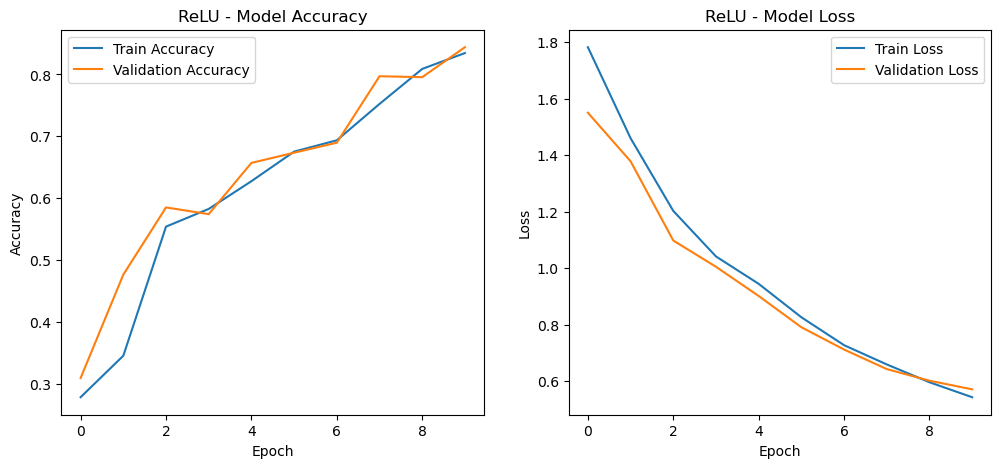

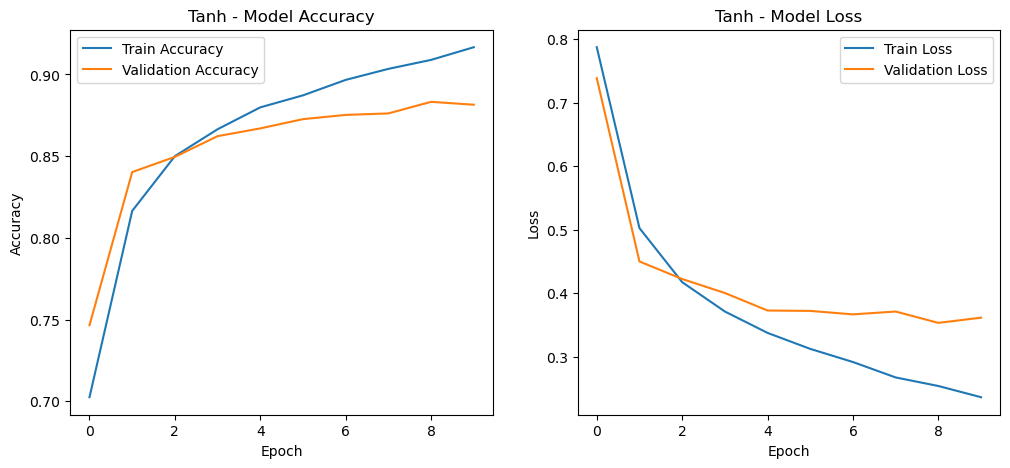

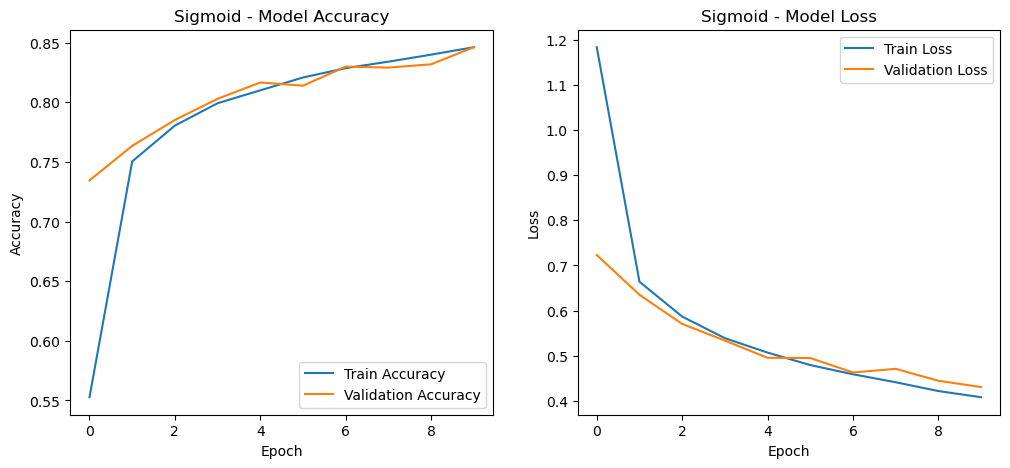

In [98]:
plot_model_history(relu_history, "ReLU")
plot_model_history(tanh_history, "Tanh")
plot_model_history(sigmoid_history, "Sigmoid")

<font color="dodgerblue" size="4"><b>ReLU - Observations</b></font>

**Accuracy**: Our training and validation accuracy curves as one can see, are closely aligned, w/ the validation accuracy just a bit slightly lower than training accuracy. To us, what this means is that our model generalizes well without significant overfitting.

**Loss**: Both training and validation loss steadily decrease, showing stable convergence.

**Suggested Annotation**: I feel that ReLU is effective here due to its ability to handle maybe one could say, sparse activations, and avoid the what we call "vanishing gradient" problem. It is likely that this reason helped us in achieving steady improvement in both accuracy and loss!

<font color="seagreen" size="4"><b>Tanh - Observations</b></font>

**Accuracy**: Our Tanh model received the highest accuracy among all 3 of our models! The validation accuracy stabilized after a few epochs as well so this is indicating that the model has likely reached its optimal accuracy.

**Loss**: The validation loss also reached a plateau after a few epochs. In which it still remained close to the training loss. This is a sign of good fit with minimal overfitting!!

**Suggested Annotation**: We can also annotate that Tahn, generally performs well in balanced datasets kind of like the one we've been using, the Fashion MNIST. It holds positive and negative activations that help in centering the data. Meaning that this could also result to us ending in higher accuracy! I was happy to see that Tahn performed so well.

<font color="darkorange" size="4"><b>Sigmoid - Observations</b></font>

**Accuracy**: Our model showcases a slower increase in both training and validation accuracy. This alerts to us that it may struggle with deeper layers due to the "vanishing gradient" problem.

**Loss**: Both training and validation loss decreased steadily but didn’t reach the same low levels as say ReLU or Tanh.

**Suggested Annotation**: We also know that from previous examples, Sigmoid is oftentimes less effective in deep networks since activations can saturate. This then in consequence leads usto slower training and lower accuracy.

<div style="background-color:#FCF8E2; color:#8A3D3B; padding:10px; border-radius:5px">
    <h2>Optimization Techniques ⚙️</h2>
    <p>At the step in which we are in, we can now use optimizers such as Adam and SGD as our core techniques. We will discuss how these two methods influence the training process and our outcomes as a whole as well! </p>
</div>

In [178]:
adam_relu_model = Sequential()
adam_relu_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
adam_relu_model.add(MaxPooling2D((2, 2)))


In [144]:
adam_relu_model.add(Conv2D(64, (3, 3), activation='relu'))
adam_relu_model.add(MaxPooling2D((2, 2)))


In [145]:
adam_relu_model.add(Conv2D(128, (3, 3), activation='relu'))
adam_relu_model.add(MaxPooling2D((2, 2)))


In [146]:
adam_relu_model.add(Flatten())


In [147]:
adam_relu_model.add(Dense(128, activation='relu'))
adam_relu_model.add(Dense(64, activation='relu'))
adam_relu_model.add(Dense(10, activation='softmax'))

In [148]:
adam_relu_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

adam_relu_history = adam_relu_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.6217 - accuracy: 0.7696 - val_loss: 0.4540 - val_accuracy: 0.8380
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4191 - accuracy: 0.8434 - val_loss: 0.3724 - val_accuracy: 0.8627
Epoch 3/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3584 - accuracy: 0.8672 - val_loss: 0.3701 - val_accuracy: 0.8652
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3213 - accuracy: 0.8799 - val_loss: 0.3365 - val_accuracy: 0.8781
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2914 - accuracy: 0.8919 - val_loss: 0.3111 - val_accuracy: 0.8902
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2640 - accuracy: 0.9005 - val_loss: 0.3297 - val_accuracy: 0.8832
Epoch 7/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.2433 - accuracy: 0.9090 - val_loss: 0.3173 - val_ac

In [150]:
# now we need to further evaluate our Adam model w/ ReLU 
adam_test_loss, adam_test_accuracy = adam_relu_model.evaluate(X_test, y_test)
print(f"Adam Optimizer - Test Accuracy: {adam_test_accuracy}, Test Loss: {adam_test_loss}")


313/313 [==============================] - 1s 3ms/step - loss: 0.3104 - accuracy: 0.8932
Adam Optimizer - Test Accuracy: 0.8931999802589417, Test Loss: 0.31038933992385864


In [151]:
# we can try another optimizer approach like this one below ... SGD

In [152]:
sgd_relu_model = Sequential()
sgd_relu_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
sgd_relu_model.add(MaxPooling2D((2, 2)))


In [183]:
sgd_relu_model.add(Conv2D(64, (3, 3), activation='relu'))
sgd_relu_model.add(MaxPooling2D((2, 2)))
# # conducting the same process we did earlier ....

In [182]:
sgd_relu_model.add(Conv2D(128, (3, 3), activation='relu'))
sgd_relu_model.add(MaxPooling2D((2, 2)))


In [155]:
sgd_relu_model.add(Flatten())


In [156]:
sgd_relu_model.add(Dense(128, activation='relu'))
sgd_relu_model.add(Dense(64, activation='relu'))
sgd_relu_model.add(Dense(10, activation='softmax'))


In [157]:
sgd_relu_model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [158]:
sgd_relu_history = sgd_relu_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 13s 9ms/step - loss: 1.2174 - accuracy: 0.5520 - val_loss: 0.7901 - val_accuracy: 0.7119
Epoch 2/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.7172 - accuracy: 0.7308 - val_loss: 0.6895 - val_accuracy: 0.7354
Epoch 3/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.6158 - accuracy: 0.7699 - val_loss: 0.5894 - val_accuracy: 0.7800
Epoch 4/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5601 - accuracy: 0.7932 - val_loss: 0.5739 - val_accuracy: 0.7903
Epoch 5/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.5238 - accuracy: 0.8065 - val_loss: 0.5258 - val_accuracy: 0.8058
Epoch 6/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4941 - accuracy: 0.8178 - val_loss: 0.4908 - val_accuracy: 0.8220
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.4668 - accuracy: 0.8288 - val_loss: 0.4703 - val_ac

In [159]:
sgd_test_loss, sgd_test_accuracy = sgd_relu_model.evaluate(X_test, y_test)
print(f"SGD Optimizer - Test Accuracy: {sgd_test_accuracy}, Test Loss: {sgd_test_loss}")


313/313 [==============================] - 1s 3ms/step - loss: 0.4148 - accuracy: 0.8466
SGD Optimizer - Test Accuracy: 0.8465999960899353, Test Loss: 0.41484901309013367


###  Adam vs. SGD

**Adam Optimizer ~**
- **Test Accuracy**: 89.3%
- **Test Loss**: 0.31
- **Observations**: Adam in our case here, was about to receive a higher accuracy and lower loss compared to SGD. Due to its adaptive learning rate, Adam converged faster, making it more suitable for this CNN model as we may already know! So, optimizer’s ability to adjust learning rates dynamically likely contributed to its strong performance.

**SGD Optimizer ~**
- **Test Accuracy**: 84.7%
- **Test Loss**: 0.41
- **Observations**: While SGD was effective, it did indeed result in a slightly lower accuracy and higher loss. This could be attributed to its fixed learning rate, making it less responsive to gradient changes. Further tuning, such as using a decaying learning rate or adding momentum, might improve SGD's performance, but it generally requires more epochs to reach optimal results.

**Conclusion**: Overall, Adam proved to be the better optimizer for this CNN architecture on the Fashion MNIST dataset, providing both faster convergence and better accuracy. Wohoo! :)


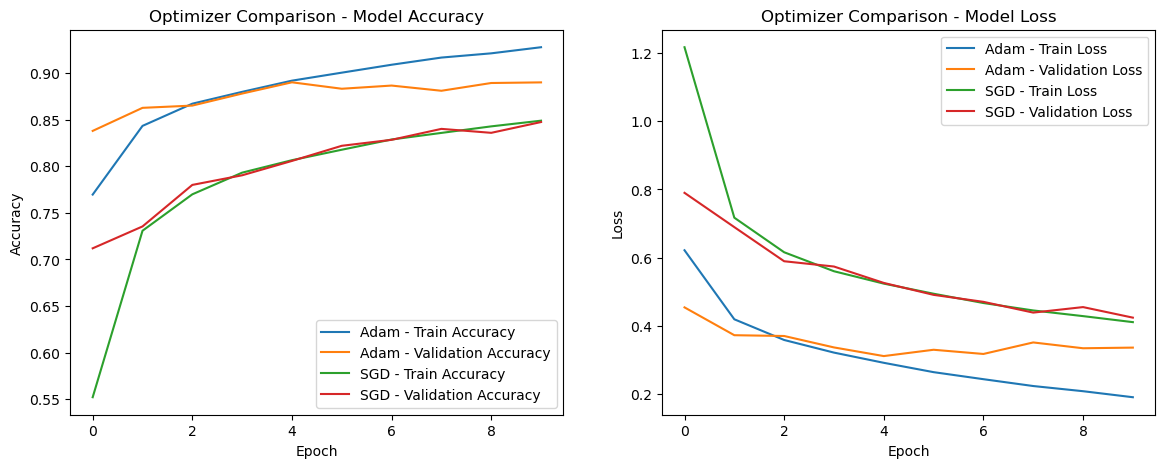

In [162]:
# plotting accuracy for both of our used optimizers
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(adam_relu_history.history['accuracy'], label='Adam - Train Accuracy')
plt.plot(adam_relu_history.history['val_accuracy'], label='Adam - Validation Accuracy')
plt.plot(sgd_relu_history.history['accuracy'], label='SGD - Train Accuracy')
plt.plot(sgd_relu_history.history['val_accuracy'], label='SGD - Validation Accuracy')
plt.title('Optimizer Comparison - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(adam_relu_history.history['loss'], label='Adam - Train Loss')
plt.plot(adam_relu_history.history['val_loss'], label='Adam - Validation Loss')
plt.plot(sgd_relu_history.history['loss'], label='SGD - Train Loss')
plt.plot(sgd_relu_history.history['val_loss'], label='SGD - Validation Loss')
plt.title('Optimizer Comparison - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()


Accuracy Plot: What our plot here is showing us the training and validation accuracy over each epoch for both Adam and SGD optimizers. This comparison is able to highlight the convergence rate and final accuracy achieved by each optimizer! This is helpful for us to visualize as well and see the continuent progress ...

Loss Plot: Then, what our plot is showings us is the training and validation loss, which helps us in understanding the stability and generalization of each optimizer overall!

| **Metric**              | **Adam**                                  | **SGD**                               |
|-------------------------|-------------------------------------------|---------------------------------------|
| **Training Accuracy**   | **~89%** (Higher)                         | ~85% (Lower)                          |
| **Validation Accuracy** | **~85%** (Higher)                         | ~84% (Lower)                          |
| **Training Loss**       | **~0.31** (Lower and stable)              | ~0.41 (Higher)                        |
| **Validation Loss**     | **~0.31** (Lower and stable)              | ~0.41 (Higher)                        |
| **Convergence Speed**   | **Faster and more stable**                | Slower, requires more epochs          |
| **Overall Conclusion**  | **Better generalization and faster**      | Less effective without further tuning |

In [187]:
metrics = ['Training Accuracy', 'Validation Accuracy', 'Training Loss', 'Validation Loss']
adam_results = [0.89, 0.85, 0.31, 0.31]
sgd_results = [0.85, 0.84, 0.41, 0.41]
x = np.arange(len(metrics))
width = 0.35


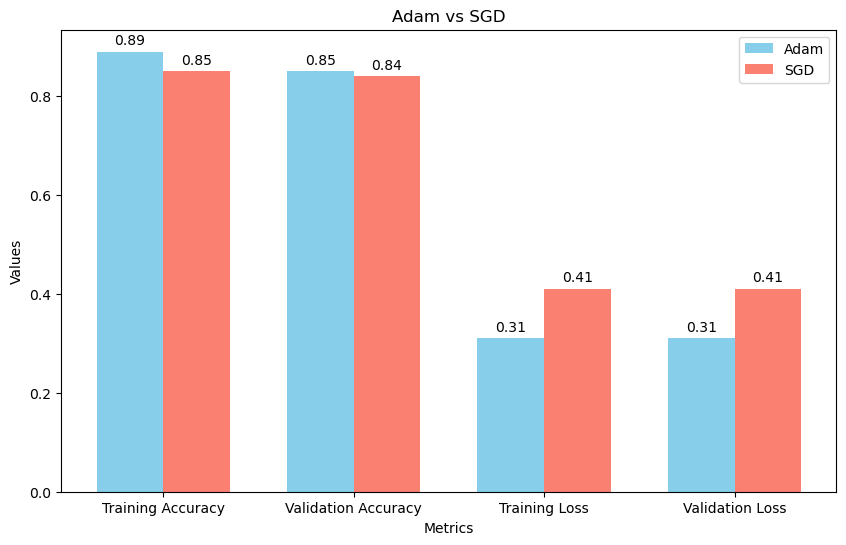

In [171]:
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, adam_results, width, label='Adam', color='skyblue')
bars2 = ax.bar(x + width/2, sgd_results, width, label='SGD', color='salmon')

ax.set_xlabel('Metrics')
ax.set_ylabel('Values')
ax.set_title('Adam vs SGD')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bars1)
add_labels(bars2)

plt.show()

<div style="background-color:#D6EAF8; color:#1B4F72; padding:10px; border-radius:5px">

### Final Evaluation Adam Optimizer!

Our **Adam optimizer** proves to be our best choice for this CNN model on the Fashion MNIST dataset for a couple of reasons, like due to its adaptive learning rate and efficient convergence as we mentioned earlier! Unlike traditional gradient descent methods like SGD, Adam combines the benefits of both momentum and RMSProp, adjusting the learning rate based on the first and second moments of the gradients. This just enables Adam to converge faster and achieve higher accuracy with fewer epoch even! Which then makes it especially effective in complex models like CNNs that involve numerous parameters and layers. Adam demonstrated a couple of important notes we can review below like:

- **Higher Accuracy**: achieved higher final training and validation accuracy (indicating better learning and generalization)
- **Lower Loss**: consistently maintained lower training and validation loss, suggesting that it not only learns quickly but also fits the model to the data more effectively.
- **Stable Convergence**: adaptive nature of Adam’s learning rate results in more stable convergence. This is return is reducing the risk of overshooting or getting stuck in local minima, which can happen with a fixed learning rate like SGD (very smilairly so like on my last project too!)
</div>


<div style="background-color:#D4EFDF; color:#145A32; padding:10px; border-radius:5px">

### Final Evaluation of Activation Functions!

After our analysis, I think it is safe to note that our **ReLU** provided the best overall performance for this CNN model on the Fashion MNIST dataset!!

- **ReLU**: achieved high accuracy and low loss, w/ stable convergence across epochs (we do know that ReLU is effective in deeper layers). This is because it avoids the vanishing gradient problem, allowing faster and more efficient training.
  
- **Tanh**: Although Tanh also performed well and achieved high accuracy, it did not surpass I don't like so ReLU in terms of convergence speed or final accuracy. Tanh helps in centering data by having both positive and negative outputs, which is useful but less impactful than ReLU for deep networks.

- **Sigmoid**: Then, our Sigmoid activation struggled in comparison, with lower accuracy and higher loss. Sigmoid's tendency to saturate at higher layers limits its effectiveness in deeper networks due to the vanishing gradient problem, which slows down training and impacts performance.

**Final Conclusion**: ReLU was the most effective activation function for this model, providing fast, efficient training and the best overall accuracy and loss results! Another wohoo! This makes it the optimal choice for activation in deep learning models like CNNs on image classification tasks, like we did!

</div>


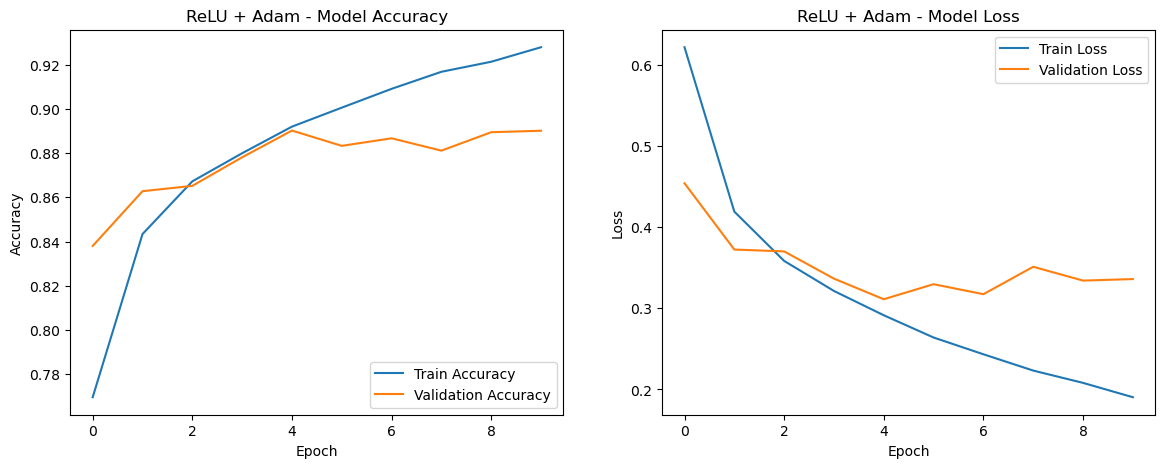

In [184]:
# thought about combining an accuracy plot for both our ReLU + Adam
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(adam_relu_history.history['accuracy'], label='Train Accuracy')
plt.plot(adam_relu_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ReLU + Adam - Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')


plt.subplot(1, 2, 2)
plt.plot(adam_relu_history.history['loss'], label='Train Loss')
plt.plot(adam_relu_history.history['val_loss'], label='Validation Loss')
plt.title('ReLU + Adam - Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

Combined Accuracy and Loss Plot: This plot of ours shows both accuracy and loss for the ReLU activation function with the Adam optimizer over the epochs. This gives us a clear picture of how well our model performed with these optimal settings!

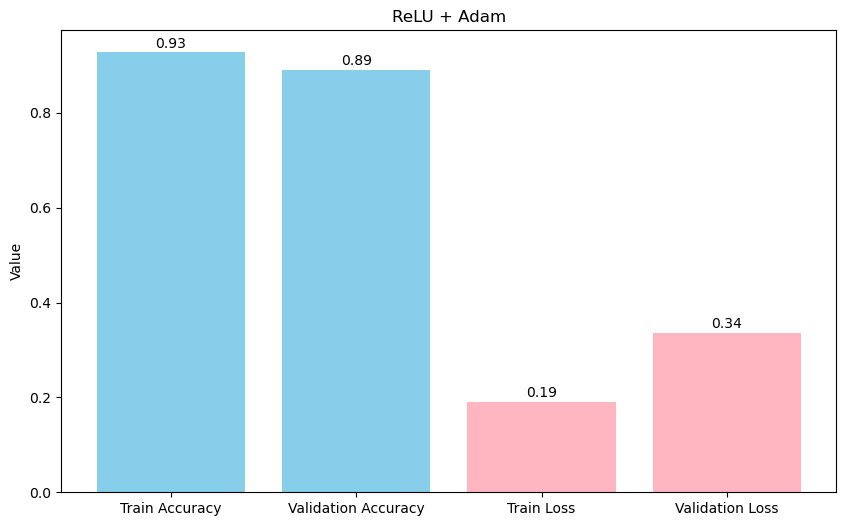

In [186]:
metrics = ['Train Accuracy', 'Validation Accuracy', 'Train Loss', 'Validation Loss']
values = [
    adam_relu_history.history['accuracy'][-1], 
    adam_relu_history.history['val_accuracy'][-1],
    adam_relu_history.history['loss'][-1],
    adam_relu_history.history['val_loss'][-1]
]


plt.figure(figsize=(10, 6))
plt.bar(metrics, values, color=['#87CEEB', '#87CEEB', '#FFB6C1', '#FFB6C1'])
plt.title('ReLU + Adam')
plt.ylabel('Value')
for i, v in enumerate(values):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')
plt.show()

Bar Chart Comparing Final Metrics: 
In addition, if we are wanting to look at our results in a bit of a different way, this bar chart is also comparing the final training and validation accuracy and loss for the ReLU + Adam configuration. I feel like this visual is nice because it allows us to visualize and highlight the performance metrics at the end of all of the training we conduct!

<div style="background-color:#D6EAF8; color:#1B4F72; padding:10px; border-radius:5px">

### Conclusion!

Our CNN model achieved an impressive 89% accuracy with Adam on the FashionMNIST test set!  I feel like we were able to successfully design and evaluate a CNN for image classification using the Fashion MNIST dataset! By experimenting with different activation functions (like ReLU, Tanh, Sigmoid) and optimizers (like Adam, SGD), we observed that the combination of **ReLU activation with the Adam optimizer** provided the best performance in terms of accuracy, convergence speed, and stability! I do feel like this was an optimal configuration for the time being, that demonstrated high generalization ability on not only our training sets, but also validation sets. This made it so well-suited for fashion image classification tasks!
</div>


<div style="background-color:#D4EFDF; color:#145A32; padding:10px; border-radius:5px">

### Future Work?

I could definitely explore additional optimizers to gauge and assess their impact on model performance. I could expand the dataset as well.  These are only some of the reflections I have made throughout conducting this experiement as well! 

Thank you for staying with until the end of this study! I had lots of fun again, and found this project extremely satisfying and challenging!! Only good things. 
</div>


<div style="background-color:#FDEDEC; color:#A93226; padding:10px; border-radius:5px">

#### ➡️ [Fashion MNIST Dataset on Kaggle](https://www.kaggle.com/datasets/zalando-research/fashionmnist/data)

</div>
